# 신용카드 연체 예측

## #01. 데이터 불러오기

In [2]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all" # Cell의 모든 반환값 출력


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:

train = pd.read_csv('신용카드_train.csv')
test = pd.read_csv('신용카드_test.csv')
train.shape, test.shape

((26457, 20), (10000, 19))

In [5]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


## #02. 변수 조사 
### 1. 기술통계

In [6]:
train.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [7]:
train.describe(include='object')

,gender,car,reality,income_type,edu_type,family_type,house_type,occyp_type
count,26457,26457,26457,26457,26457,26457,26457,18286
unique,2,2,2,5,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,17697,16410,17830,13645,17995,18196,23653,4512


DAYS_BIRTH: 출생일

DAYS_EMPLOYED: 업무 시작일

begin_month: 신용카드 발급 월

In [8]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [9]:
## 날짜단위가 아닌 연단위로 바꾸기 
train.loc[train['DAYS_BIRTH']>0,'DAYS_BIRTH'] = 0 
train['DAYS_BIRTH'] = (train['DAYS_BIRTH']*-1)/365.0

train['DAYS_EMPLOYED'] = (train['DAYS_EMPLOYED']*-1) / 365.0

train['begin_month'] = train['begin_month']*-1
 

### 2. 범주형 변수 값 확인

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)


In [11]:
cat = train.select_dtypes(exclude='number')
for col in cat.columns:
    print('-------',col,'-----------')
    print(cat[col].value_counts())
    print('------------------------')

------- gender -----------
gender
F    17697
M     8760
Name: count, dtype: int64
------------------------
------- car -----------
car
N    16410
Y    10047
Name: count, dtype: int64
------------------------
------- reality -----------
reality
Y    17830
N     8627
Name: count, dtype: int64
------------------------
------- income_type -----------
income_type
Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: count, dtype: int64
------------------------
------- edu_type -----------
edu_type
Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: count, dtype: int64
------------------------
------- family_type -----------
family_type
Married                 18196
Single / not married     3496
Civil marriage           2123
Separated           

In [12]:
train.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')

gender
F    17697
M     8760
Name: index, dtype: int64

([<matplotlib.patches.Wedge at 0x21c85208970>,
 [Text(-0.556660348236011, 0.9487514198681145, 'F'),
  Text(0.5566602594074893, -0.9487514719864137, 'M')],
 [Text(-0.3036329172196423, 0.517500774473517, '66.9%'),
  Text(0.30363286876772144, -0.5175008029016801, '33.1%')])

Text(0.5, 1.0, 'Gender distribution')

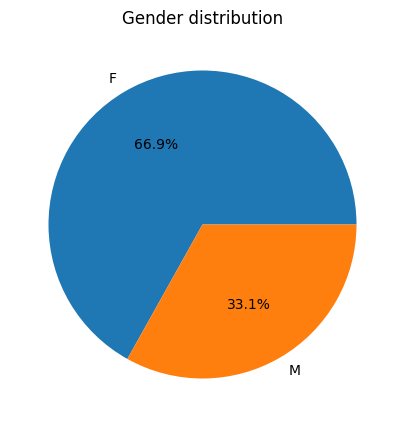

In [13]:
train1 = train.groupby('gender').count()['index']
train1
fig = plt.figure(figsize=(5,5))
fig.set_facecolor('white')
plt.pie(train1,labels=train1.index,autopct='%1.1f%%')
plt.title('Gender distribution')
plt.show()
plt.close()

<Axes: ylabel='Frequency'>

Text(0.5, 0, 'age')

Text(0.5, 1.0, 'Age distribution')

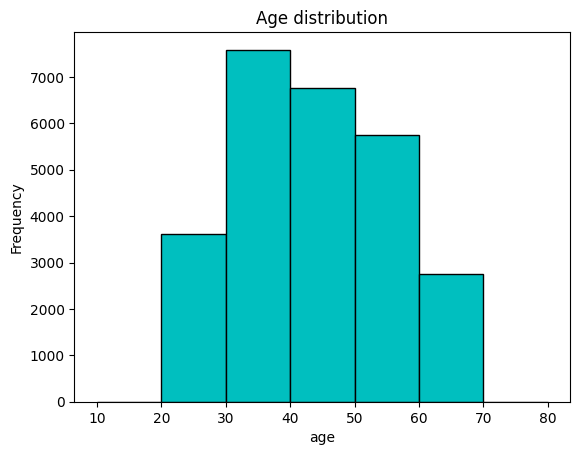

In [14]:
train['DAYS_BIRTH'].plot.hist(bins=range(10,81,10),color='c',edgecolor='k')
plt.xlabel('age')
plt.title('Age distribution')
plt.show()

주로 3,4,50대가 주를 이루고 있음.

In [15]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.00,Commercial associate,Higher education,Married,Municipal apartment,38.08,12.90,1,0,0,0,NaN,2.00,6.00,1.00
1,1,F,N,Y,1,247500.00,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,31.18,4.22,1,0,0,1,Laborers,3.00,5.00,1.00
2,2,M,Y,Y,0,450000.00,Working,Higher education,Married,House / apartment,52.29,12.15,1,0,1,0,Managers,2.00,22.00,2.00
3,3,F,N,Y,0,202500.00,Commercial associate,Secondary / secondary special,Married,House / apartment,41.34,5.73,1,0,1,0,Sales staff,2.00,37.00,0.00
4,4,F,Y,Y,0,157500.00,State servant,Higher education,Married,House / apartment,41.20,5.77,1,0,0,0,Managers,2.00,26.00,2.00


c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

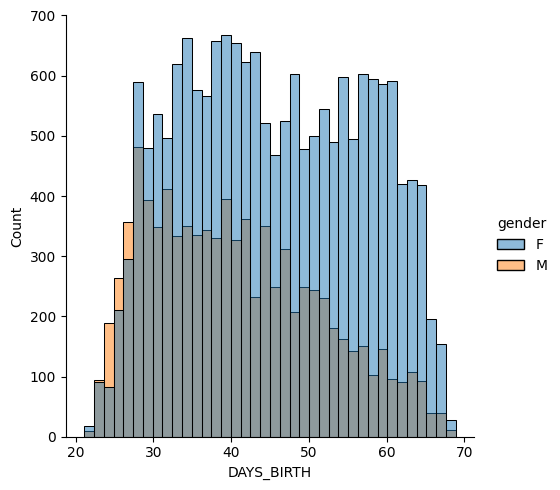

In [16]:
import seaborn as sns

sns.displot(x='DAYS_BIRTH',hue='gender', kind='hist', data=train)
plt.show()

여자가 연체된 경우가 많군

차량소유 변수 시각화

In [17]:
df1 = train.groupby('car').count()['index']
df1

car
N    16410
Y    10047
Name: index, dtype: int64

차를 소유하지 않은 사람과 소유한 사람 차이 좀 난다.

- 부동산 변수

In [18]:
train['reality'].unique()

array(['N', 'Y'], dtype=object)

([<matplotlib.patches.Wedge at 0x21c86a04a00>,
 [Text(-0.4057456614910041, 1.0224335959763977, 'N'),
  Text(0.40574566149100416, -1.0224335959763977, 'Y')],
 [Text(-0.2213158153587295, 0.5576910523507623, '62.0%'),
  Text(0.22131581535872955, -0.5576910523507623, '38.0%')])

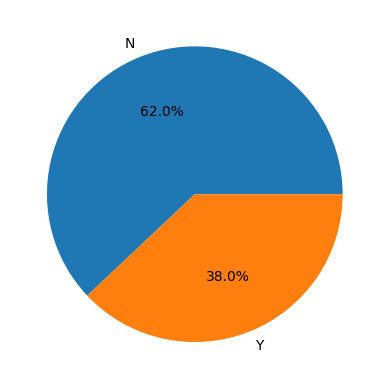

In [21]:
train1 = train.groupby('reality').count()['index']
plt.pie(df1,autopct='%1.1f%%',labels=df1.index)

소유 안한사람이 더 많으

### income type 확인 

In [23]:
it = train.groupby('income_type').count()['index']
it

income_type
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Working                 13645
Name: index, dtype: int64

([<matplotlib.patches.Wedge at 0x21c86a5b820>,
 [Text(0.8149461854483414, 0.7388252261686777, 'Commercial associate'),
  Text(-0.458943004615662, 0.9996856098365868, 'Pensioner'),
  Text(-1.0308944697566451, 0.383740266619449, 'State servant'),
  Text(-1.0945326059358087, 0.10953709208924502, 'Student'),
  Text(-0.05438012043573633, -1.0986549970310948, 'Working')],
 [Text(0.4445161011536407, 0.40299557791018786, '23.4%'),
  Text(-0.25033254797217924, 0.5452830599108655, '16.8%'),
  Text(-0.5623060744127154, 0.20931287270151763, '8.1%'),
  Text(-0.5970177850558956, 0.059747504775951824, '0.0%'),
  Text(-0.029661883874037995, -0.5992663620169608, '51.6%')])

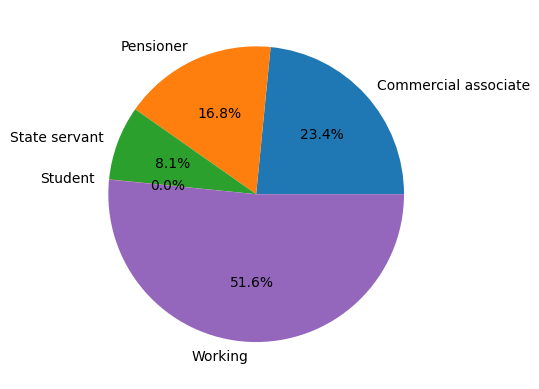

In [24]:
plt.pie(it,autopct='%1.1f%%',labels=it.index)

### 교육수준 데이터 시각화

In [34]:
et = train.groupby('edu_type').count()['index']

et = pd.DataFrame(et)
et


,index
edu_type,
Academic degree,23
Higher education,7162
Incomplete higher,1020
Lower secondary,257
Secondary / secondary special,17995


c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='edu_type', ylabel='index'>

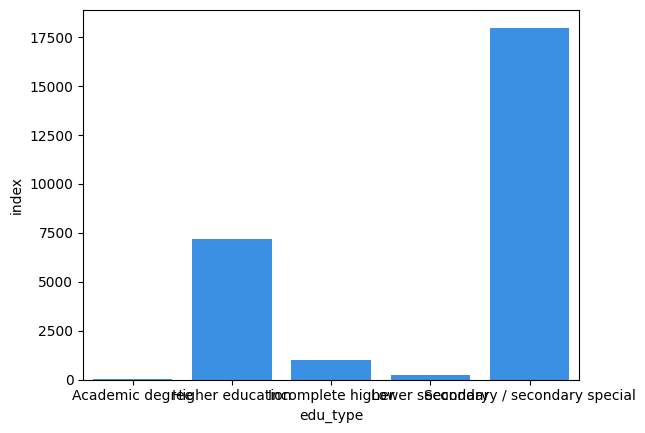

In [35]:
sns.barplot(data=et,y='index',x=et.index,color='dodgerblue')

### 결혼여부

([<matplotlib.patches.Wedge at 0x21cab21faf0>,
 [Text(1.0652319713414065, 0.27437355417769604, 'Civil marriage'),
  Text(-0.9773378402927326, 0.5047878226858661, 'Married'),
  Text(0.3207073277557112, -1.0522104399424057, 'Separated'),
  Text(0.857349775800998, -0.6891671509394355, 'Single / not married'),
  Text(1.0905786854710764, -0.14365977445401734, 'Widow')],
 [Text(0.5810356207316763, 0.14965830227874327, '8.0%'),
  Text(-0.5330933674323995, 0.27533881237410873, '68.8%'),
  Text(0.17493126968493336, -0.5739329672413122, '5.8%'),
  Text(0.46764533225508975, -0.3759093550578739, '13.2%'),
  Text(0.5948611011660416, -0.07835987697491854, '4.2%')])

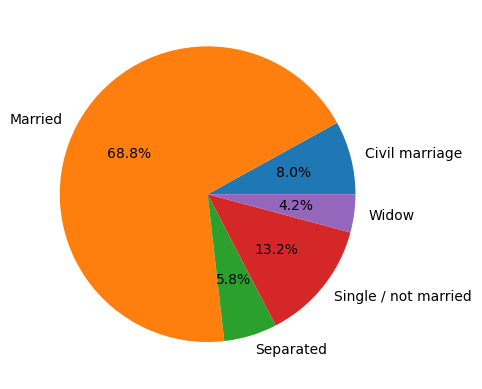

In [36]:
train1 = train.groupby('family_type').count()['index']
plt.pie(train1,autopct='%1.1f%%',labels=train1.index)